In [10]:
#Imports the libraries needed
import numpy as np
import yfinance as yf
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

TRAIN_START_DATE = '1960-01-01'
TRAIN_END_DATE = '2015-12-31'
PREDICT_START_DATE = '2016-01-01'
PREDICT_END_DATE = '2019-12-31'

daysAdv = 7
prevDays = 6
split_ratio = 0.8

In [ ]:

# Download S&P 500 Index data from Yahoo Finance using yfinance
sp500 = yf.download('^GSPC', start=TRAIN_START_DATE, end=PREDICT_END_DATE)

# Create features and target variables
features = []
targets = []

#Runs through the Yahoo Finance Dataset and splits it into the features and targets
for i in range(prevDays, len(sp500) - daysAdv):
    prev_days = sp500['Close'][i - prevDays:i].values.tolist()
    target = sp500['Close'][i + daysAdv]
    features.append(prev_days)
    targets.append(target)


X = np.array(features)
y = np.array(targets)

# Split dataset into training and testing sets
split_idx = int(len(X) * split_ratio)

X_train = X[:split_idx]
y_train = y[:split_idx]

X_test = X[split_idx:]
y_test = y[split_idx:]

# Define neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=prevDays, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=['accuracy', 'mse'])


# Train model and record history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)





472/472 [==============================] - 1s 1ms/step


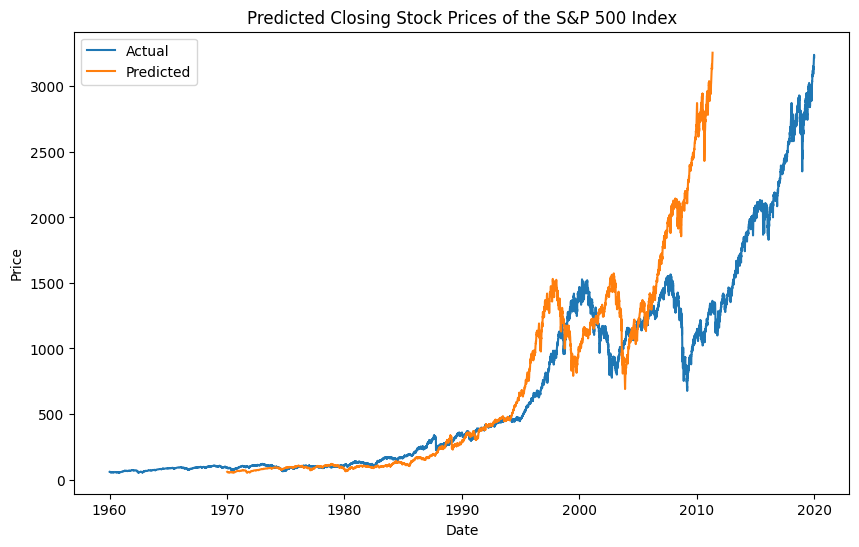

Mean squared error:  2301.3541390587106
Mean absolute error:  33.775978609139436
R² is score:  0.9942898079896123


In [12]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Make predictions on future data
future_features = []
for i in range(prevDays, len(sp500)):
    prev_days = sp500['Close'][i - prevDays:i].values.tolist() #Makes a list of closing prices for the previous 6 days before the day of the closing price to be predicted
    future_features.append(prev_days)

X_future = np.array(future_features)

y_future = model.predict(X_future)

# Plot predicted closing stock prices of the S&P 500 index
plt.figure(figsize=(10, 6))
plt.plot(sp500['Close'], label='Actual')
plt.plot(np.arange(prevDays, len(sp500)), y_future, label='Predicted')
plt.title('Predicted Closing Stock Prices of the S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)

r2Score = r2_score(y_test, y_pred)
print("R² is score: ", r2Score)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
